In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Stock_Price_3000 Companies.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389314 entries, 0 to 15389313
Data columns (total 14 columns):
ticker         object
date           object
open           float64
high           float64
low            float64
close          float64
volume         float64
ex-dividend    float64
split_ratio    float64
adj_open       float64
adj_high       float64
adj_low        float64
adj_close      float64
adj_volume     float64
dtypes: float64(12), object(2)
memory usage: 1.6+ GB


In [4]:
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0


In [5]:
#Set 'date' as index for time series
df.date = pd.to_datetime(df['date']) #convert 'date' to DateTime object
df.set_index('date', inplace = True) #set 'date' as index

#Add year, month, day_of_week to df
df['year'], df['month'], df['day_of_week'] = df.index.year, df.index.month, df.index.weekday_name 

df.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,year,month,day_of_week
date,,,,,,,,,,,,,,,,
1999-11-18,A,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0,1999,11,Thursday
1999-11-19,A,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0,1999,11,Friday
1999-11-22,A,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0,1999,11,Monday
1999-11-23,A,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0,1999,11,Tuesday
1999-11-24,A,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0,1999,11,Wednesday


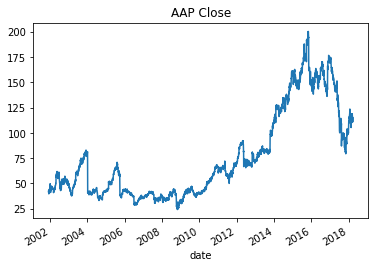

In [7]:
aap = df.loc[df['ticker']=='AAP',:] #extract aap from df
aap['close'].plot(title='AAP Close') #plot Close price of AAP
plt.show()

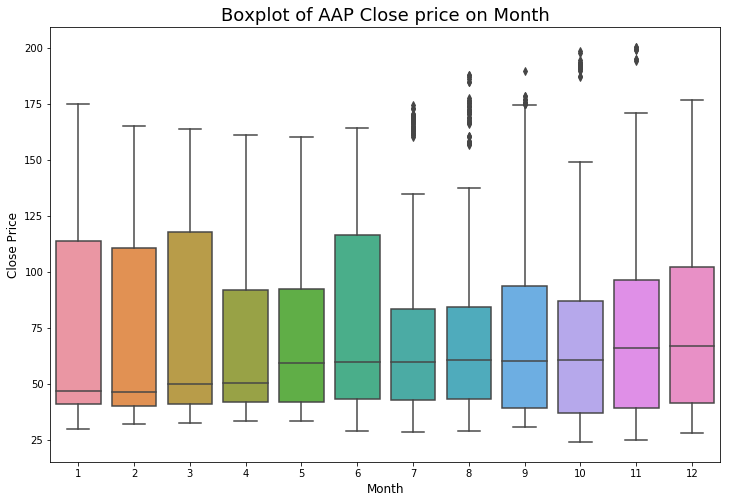

In [16]:
#Close Price vs. Month to detect Seasonality

plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'close', data = aap)
plt.ylabel('Close Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of AAP Close price on Month', fontsize = 18)
plt.show()

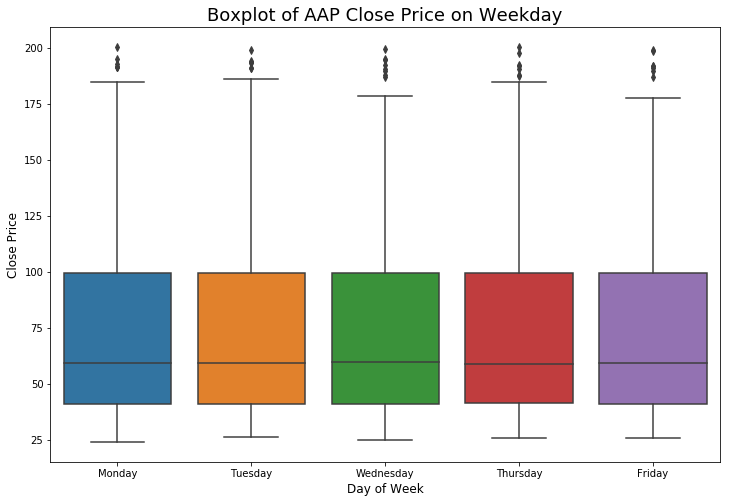

In [17]:
#Close price vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = 'day_of_week', y = 'close', data = aap, order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.ylabel('Close Price', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Boxplot of AAP Close Price on Weekday', fontsize = 18)
plt.show()

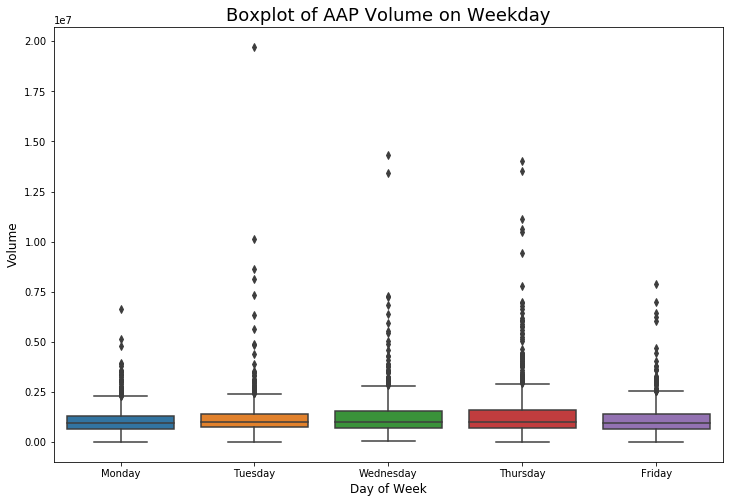

In [18]:
#Volume vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = 'day_of_week', y = 'adj_volume', data = aap, order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Boxplot of AAP Volume on Weekday', fontsize = 18)
plt.show()

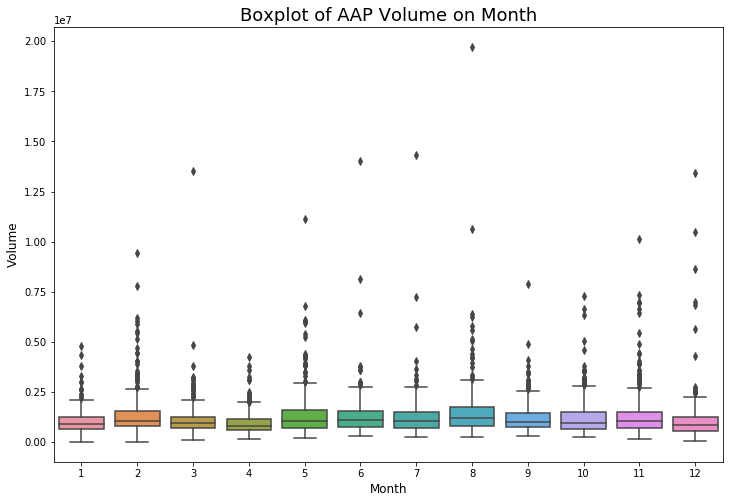

In [19]:
#Volume vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'adj_volume', data = aap)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of AAP Volume on Month', fontsize = 18)
plt.show()

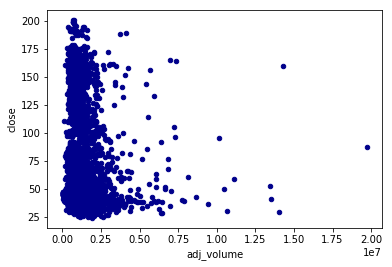

In [20]:
aap.plot.scatter(x='adj_volume',y='close',c='DarkBlue')

In [89]:
sample = aap.loc['2018-01-01':'2018-03-27',:]

In [90]:
sample.tail()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,year,month,day_of_week
date,,,,,,,,,,,,,,,,
2018-03-21,AAP,114.66,116.29,114.2397,115.24,689137.0,0.0,1.0,114.66,116.29,114.2397,115.24,689137.0,2018,3,Wednesday
2018-03-22,AAP,114.02,115.14,111.6300,111.71,1038170.0,0.0,1.0,114.02,115.14,111.6300,111.71,1038170.0,2018,3,Thursday
2018-03-23,AAP,112.41,113.26,110.3400,110.84,1081320.0,0.0,1.0,112.41,113.26,110.3400,110.84,1081320.0,2018,3,Friday
2018-03-26,AAP,112.49,115.07,111.8750,114.77,1007919.0,0.0,1.0,112.49,115.07,111.8750,114.77,1007919.0,2018,3,Monday
2018-03-27,AAP,114.58,117.45,113.2900,115.01,1402702.0,0.0,1.0,114.58,117.45,113.2900,115.01,1402702.0,2018,3,Tuesday


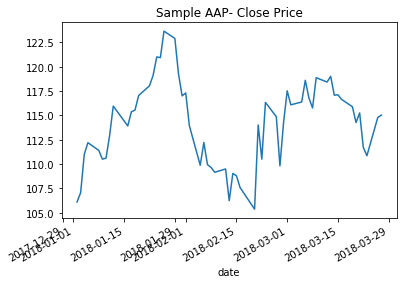

In [91]:
sample['close'].plot(title='Sample AAP- Close Price')
plt.show()

Test MSE: 9.890


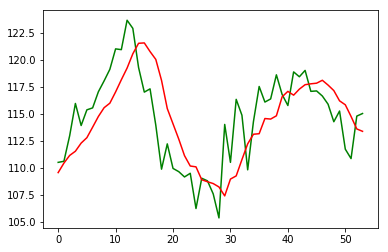

In [124]:
from sklearn.metrics import mean_squared_error
#prepare data
X = sample['close'].values


window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window,len(X))]
predictions = list()

#walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
#    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
#print(len(predictions))

# plot
plt.plot(test, color = 'green')
plt.plot(predictions, color='red')
#plt.plot(X, color='black')
plt.show()

# zoom plot
#plt.plot(test[0:100])
#plt.plot(predictions[0:100], color='red')
#plt.show()

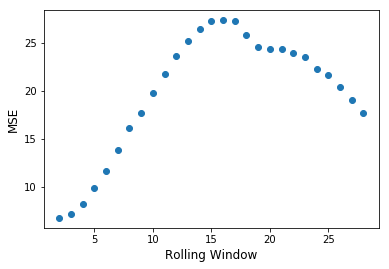

In [125]:
from sklearn.metrics import mean_squared_error
#prepare data
X = sample['close'].values
N = list()
MSE = list()

for window in range(2,int(len(X)/2)):
#window = 2
    N.append(window)
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window,len(X))]
    predictions = list()

#walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = np.mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
#    print('predicted=%f, expected=%f' % (yhat, obs))

    error = mean_squared_error(test, predictions)
    MSE.append(error)

#print(N)
#print(MSE)
    
#plot
plt.scatter(N,MSE)
plt.xlabel('Rolling Window', fontsize = 12)
plt.ylabel('MSE', fontsize = 12)
plt.show()
#print('Test MSE: %.3f' % error)
#print(len(predictions))

# plot
#plt.plot(test, color = 'green')
#plt.plot(predictions, color='red')
#plt.plot(X, color='black')
#plt.show()

# zoom plot
#plt.plot(test[0:100])
#plt.plot(predictions[0:100], color='red')
#plt.show()

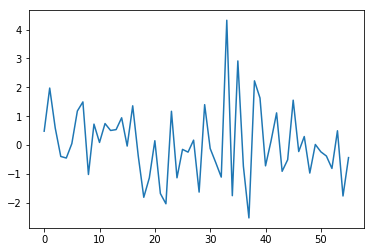

In [119]:
#Dataset
XX = sample['close'].values

#Initialize
grad = list()

#Loop over sample
for i in range(1,len(XX)-2):
    slope = 1/2*(-XX[i-1]+XX[i])
    grad.append(slope)
    
#result
plt.plot(grad)
#plt.plot(XX)
plt.show()

In [21]:
#The rest is old work. Keep here for record & review 

In [19]:
aap.head(5)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
25391,AAP,2001-11-29,40.20,43.40,40.15,41.70,123700.0,0.0,1.0,12.794079,13.812513,12.778166,13.271470,371100.0
25392,AAP,2001-11-30,41.70,42.85,41.65,42.85,55100.0,0.0,1.0,13.271470,13.637470,13.255557,13.637470,165300.0
25393,AAP,2001-12-03,42.70,42.70,41.35,41.35,42500.0,0.0,1.0,13.589731,13.589731,13.160079,13.160079,127500.0
25394,AAP,2001-12-04,41.35,41.35,39.70,39.70,31800.0,0.0,1.0,13.160079,13.160079,12.634949,12.634949,95400.0
25395,AAP,2001-12-05,40.30,44.35,40.30,44.00,199400.0,0.0,1.0,12.825905,14.114861,12.825905,14.003470,598200.0


In [24]:
aap2 = df.loc[df['ticker']=='AAP',:] #extract aap again from df
aap2.set_index('date', inplace = True) #this time we set time index
aap2.head(5)

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2001-11-29,AAP,40.20,43.40,40.15,41.70,123700.0,0.0,1.0,12.794079,13.812513,12.778166,13.271470,371100.0
2001-11-30,AAP,41.70,42.85,41.65,42.85,55100.0,0.0,1.0,13.271470,13.637470,13.255557,13.637470,165300.0
2001-12-03,AAP,42.70,42.70,41.35,41.35,42500.0,0.0,1.0,13.589731,13.589731,13.160079,13.160079,127500.0
2001-12-04,AAP,41.35,41.35,39.70,39.70,31800.0,0.0,1.0,13.160079,13.160079,12.634949,12.634949,95400.0
2001-12-05,AAP,40.30,44.35,40.30,44.00,199400.0,0.0,1.0,12.825905,14.114861,12.825905,14.003470,598200.0


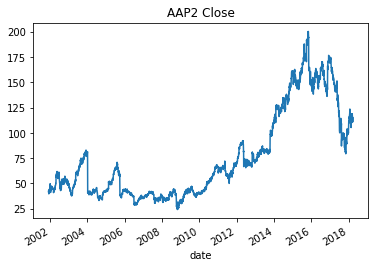

In [25]:
aap2['close'].plot(title='AAP2 Close')
plt.show()

In [26]:
#I want to extract year, month, day of week, but do not know how to do that with 'date' set as index
#Here I work on aap with 'date' as DateTime object

#Extract year, month, weekday from 'date' column
aap['year'], aap['month'] = aap['date'].dt.year, aap['date'].dt.month
aap['day_of_week'] = aap['date'].dt.day_name()

#Print it out
aap.head(5)

C:\Users\quocn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\quocn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,year,month,day_of_week
25391,AAP,2001-11-29,40.20,43.40,40.15,41.70,123700.0,0.0,1.0,12.794079,13.812513,12.778166,13.271470,371100.0,2001,11,Thursday
25392,AAP,2001-11-30,41.70,42.85,41.65,42.85,55100.0,0.0,1.0,13.271470,13.637470,13.255557,13.637470,165300.0,2001,11,Friday
25393,AAP,2001-12-03,42.70,42.70,41.35,41.35,42500.0,0.0,1.0,13.589731,13.589731,13.160079,13.160079,127500.0,2001,12,Monday
25394,AAP,2001-12-04,41.35,41.35,39.70,39.70,31800.0,0.0,1.0,13.160079,13.160079,12.634949,12.634949,95400.0,2001,12,Tuesday
25395,AAP,2001-12-05,40.30,44.35,40.30,44.00,199400.0,0.0,1.0,12.825905,14.114861,12.825905,14.003470,598200.0,2001,12,Wednesday


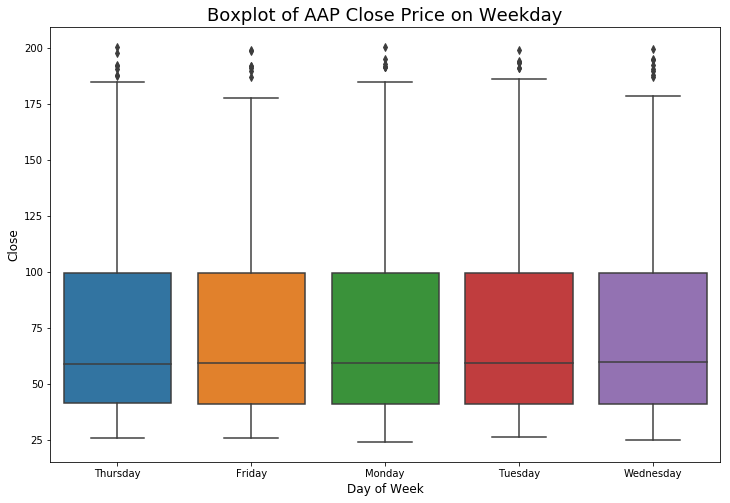

In [30]:
#Close price vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = 'day_of_week', y = 'close', data = aap)
plt.ylabel('Close', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Boxplot of AAP Close Price on Weekday', fontsize = 18)
plt.show()

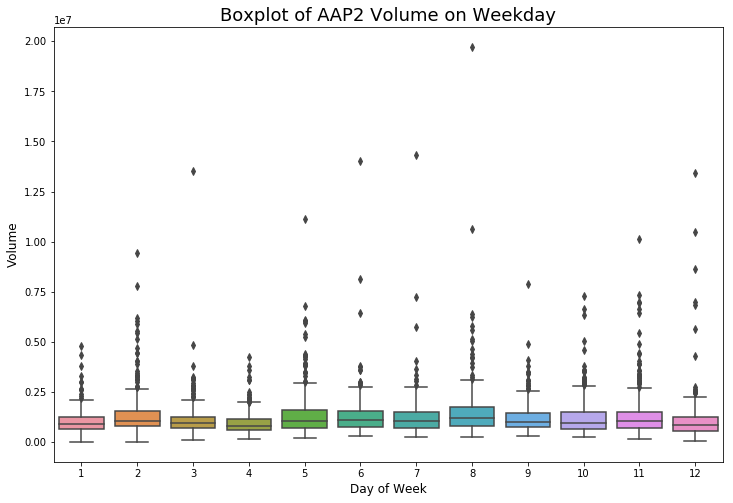

In [33]:
#Volume vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = aap2.index.month, y = 'adj_volume', data = aap2)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Boxplot of AAP2 Volume on Weekday', fontsize = 18)
plt.show()

In [34]:
aap2.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2001-11-29,AAP,40.20,43.40,40.15,41.70,123700.0,0.0,1.0,12.794079,13.812513,12.778166,13.271470,371100.0
2001-11-30,AAP,41.70,42.85,41.65,42.85,55100.0,0.0,1.0,13.271470,13.637470,13.255557,13.637470,165300.0
2001-12-03,AAP,42.70,42.70,41.35,41.35,42500.0,0.0,1.0,13.589731,13.589731,13.160079,13.160079,127500.0
2001-12-04,AAP,41.35,41.35,39.70,39.70,31800.0,0.0,1.0,13.160079,13.160079,12.634949,12.634949,95400.0
2001-12-05,AAP,40.30,44.35,40.30,44.00,199400.0,0.0,1.0,12.825905,14.114861,12.825905,14.003470,598200.0


In [36]:
aap2['year'], aap2['month'] = aap2.index.year, aap2.index.month
aap2['day_of_week'] = aap2.index.weekday_name
aap2.head()

C:\Users\quocn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\quocn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,year,month,day_of_week
date,,,,,,,,,,,,,,,,
2001-11-29,AAP,40.20,43.40,40.15,41.70,123700.0,0.0,1.0,12.794079,13.812513,12.778166,13.271470,371100.0,2001,11,Thursday
2001-11-30,AAP,41.70,42.85,41.65,42.85,55100.0,0.0,1.0,13.271470,13.637470,13.255557,13.637470,165300.0,2001,11,Friday
2001-12-03,AAP,42.70,42.70,41.35,41.35,42500.0,0.0,1.0,13.589731,13.589731,13.160079,13.160079,127500.0,2001,12,Monday
2001-12-04,AAP,41.35,41.35,39.70,39.70,31800.0,0.0,1.0,13.160079,13.160079,12.634949,12.634949,95400.0,2001,12,Tuesday
2001-12-05,AAP,40.30,44.35,40.30,44.00,199400.0,0.0,1.0,12.825905,14.114861,12.825905,14.003470,598200.0,2001,12,Wednesday


In [8]:
df.set_index('date', inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15389314 entries, 1999-11-18 to 2018-03-27
Data columns (total 13 columns):
ticker         object
open           float64
high           float64
low            float64
close          float64
volume         float64
ex-dividend    float64
split_ratio    float64
adj_open       float64
adj_high       float64
adj_low        float64
adj_close      float64
adj_volume     float64
dtypes: float64(12), object(1)
memory usage: 1.6+ GB


In [10]:
df.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
1999-11-18,A,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1999-11-19,A,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
1999-11-22,A,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
1999-11-23,A,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
1999-11-24,A,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0


In [11]:
df.tail()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2018-03-21,ZUMZ,23.80,24.60,23.6058,23.95,354092.0,0.0,1.0,23.80,24.60,23.6058,23.95,354092.0
2018-03-22,ZUMZ,23.90,24.35,23.3000,23.35,269607.0,0.0,1.0,23.90,24.35,23.3000,23.35,269607.0
2018-03-23,ZUMZ,23.55,24.20,23.4500,23.55,301584.0,0.0,1.0,23.55,24.20,23.4500,23.55,301584.0
2018-03-26,ZUMZ,23.75,24.80,23.7000,24.65,375320.0,0.0,1.0,23.75,24.80,23.7000,24.65,375320.0
2018-03-27,ZUMZ,24.65,24.65,23.3500,23.60,403884.0,0.0,1.0,24.65,24.65,23.3500,23.60,403884.0


In [12]:
zumz = df.loc[df['ticker']=='ZUMZ',:] #extract ZUMZ from df

In [13]:
zumz.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3244 entries, 2005-05-06 to 2018-03-27
Data columns (total 13 columns):
ticker         3244 non-null object
open           3244 non-null float64
high           3244 non-null float64
low            3244 non-null float64
close          3244 non-null float64
volume         3244 non-null float64
ex-dividend    3244 non-null float64
split_ratio    3244 non-null float64
adj_open       3244 non-null float64
adj_high       3244 non-null float64
adj_low        3244 non-null float64
adj_close      3244 non-null float64
adj_volume     3244 non-null float64
dtypes: float64(12), object(1)
memory usage: 354.8+ KB


In [14]:
zumz.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2005-05-06,ZUMZ,20.55,25.15,20.50,24.87,3398300.0,0.0,1.0,10.275,12.575,10.250,12.435,6796600.0
2005-05-09,ZUMZ,25.10,25.69,23.40,24.51,402500.0,0.0,1.0,12.550,12.845,11.700,12.255,805000.0
2005-05-10,ZUMZ,24.50,24.60,23.76,24.10,179400.0,0.0,1.0,12.250,12.300,11.880,12.050,358800.0
2005-05-11,ZUMZ,24.20,24.60,23.85,24.25,141200.0,0.0,1.0,12.100,12.300,11.925,12.125,282400.0
2005-05-12,ZUMZ,23.66,24.00,23.50,23.50,126100.0,0.0,1.0,11.830,12.000,11.750,11.750,252200.0


In [15]:
zumz.tail()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2018-03-21,ZUMZ,23.80,24.60,23.6058,23.95,354092.0,0.0,1.0,23.80,24.60,23.6058,23.95,354092.0
2018-03-22,ZUMZ,23.90,24.35,23.3000,23.35,269607.0,0.0,1.0,23.90,24.35,23.3000,23.35,269607.0
2018-03-23,ZUMZ,23.55,24.20,23.4500,23.55,301584.0,0.0,1.0,23.55,24.20,23.4500,23.55,301584.0
2018-03-26,ZUMZ,23.75,24.80,23.7000,24.65,375320.0,0.0,1.0,23.75,24.80,23.7000,24.65,375320.0
2018-03-27,ZUMZ,24.65,24.65,23.3500,23.60,403884.0,0.0,1.0,24.65,24.65,23.3500,23.60,403884.0


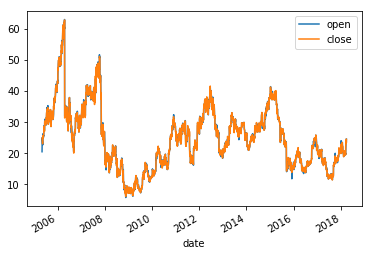

In [18]:
#close_series = zumz['close']
y_columns = ['open','close']
zumz.plot(y=y_columns)
plt.show()

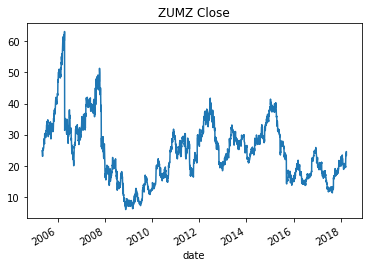

In [19]:
zumz['close'].plot(title='ZUMZ Close')
plt.show()

In [53]:
apple = df.loc[df['ticker']=='AAPL',:] #extract apple from df

In [22]:
apple.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
1980-12-12,AAPL,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,AAPL,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,AAPL,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,AAPL,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,AAPL,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


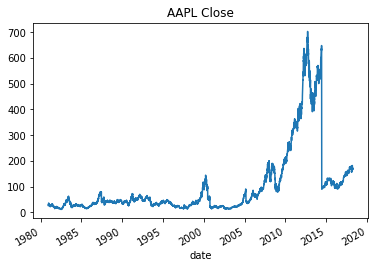

In [61]:
apple['close'].plot(title='AAPL Close')
plt.show()

In [25]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9400 entries, 1980-12-12 to 2018-03-27
Data columns (total 13 columns):
ticker         9400 non-null object
open           9400 non-null float64
high           9400 non-null float64
low            9400 non-null float64
close          9400 non-null float64
volume         9400 non-null float64
ex-dividend    9400 non-null float64
split_ratio    9400 non-null float64
adj_open       9400 non-null float64
adj_high       9400 non-null float64
adj_low        9400 non-null float64
adj_close      9400 non-null float64
adj_volume     9400 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.0+ MB


In [58]:
apple.loc['2014-06-05':'2014-06-18','close']

date
2014-06-05    647.35
2014-06-06    645.57
2014-06-09     93.70
2014-06-10     94.25
2014-06-11     93.86
2014-06-12     92.29
2014-06-13     91.28
2014-06-16     92.20
2014-06-17     92.08
2014-06-18     92.18
Name: close, dtype: float64

In [69]:
df2 = pd.read_csv('Stock_Price_3000 Companies.csv')

In [136]:
#Convert 'date' column to datetime object, but do not use as index
df2['date'] = pd.to_datetime(df2['date'])

In [137]:
aap = df2.loc[df2['ticker']=='AAP',:] #extract aap from df2

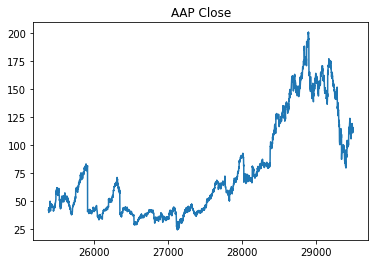

In [138]:
aap['close'].plot(title='AAP Close')
plt.show()

In [139]:
aap.head(5)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
25391,AAP,2001-11-29,40.20,43.40,40.15,41.70,123700.0,0.0,1.0,12.794079,13.812513,12.778166,13.271470,371100.0
25392,AAP,2001-11-30,41.70,42.85,41.65,42.85,55100.0,0.0,1.0,13.271470,13.637470,13.255557,13.637470,165300.0
25393,AAP,2001-12-03,42.70,42.70,41.35,41.35,42500.0,0.0,1.0,13.589731,13.589731,13.160079,13.160079,127500.0
25394,AAP,2001-12-04,41.35,41.35,39.70,39.70,31800.0,0.0,1.0,13.160079,13.160079,12.634949,12.634949,95400.0
25395,AAP,2001-12-05,40.30,44.35,40.30,44.00,199400.0,0.0,1.0,12.825905,14.114861,12.825905,14.003470,598200.0


In [143]:
#Extract year & month from 'date' column
aap['year'], aap['month'] = aap['date'].dt.year, aap['date'].dt.month

C:\Users\quocn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [144]:
#Extract weekday from 'date'
aap['day_of_week'] = aap['date'].dt.day_name()

C:\Users\quocn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [145]:
#Now we have 3 extra columns: year, month, day_of_week

aap.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,year,month,day_of_week
25391,AAP,2001-11-29,40.20,43.40,40.15,41.70,123700.0,0.0,1.0,12.794079,13.812513,12.778166,13.271470,371100.0,2001,11,Thursday
25392,AAP,2001-11-30,41.70,42.85,41.65,42.85,55100.0,0.0,1.0,13.271470,13.637470,13.255557,13.637470,165300.0,2001,11,Friday
25393,AAP,2001-12-03,42.70,42.70,41.35,41.35,42500.0,0.0,1.0,13.589731,13.589731,13.160079,13.160079,127500.0,2001,12,Monday
25394,AAP,2001-12-04,41.35,41.35,39.70,39.70,31800.0,0.0,1.0,13.160079,13.160079,12.634949,12.634949,95400.0,2001,12,Tuesday
25395,AAP,2001-12-05,40.30,44.35,40.30,44.00,199400.0,0.0,1.0,12.825905,14.114861,12.825905,14.003470,598200.0,2001,12,Wednesday


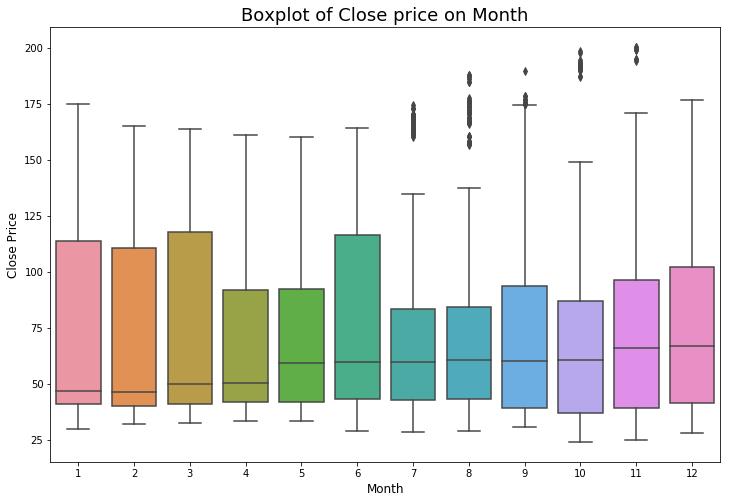

In [147]:
#Close Price vs. Month to detect Seasonality

plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'close', data = aap)
plt.ylabel('Close Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of Close price on Month', fontsize = 18)
plt.show()

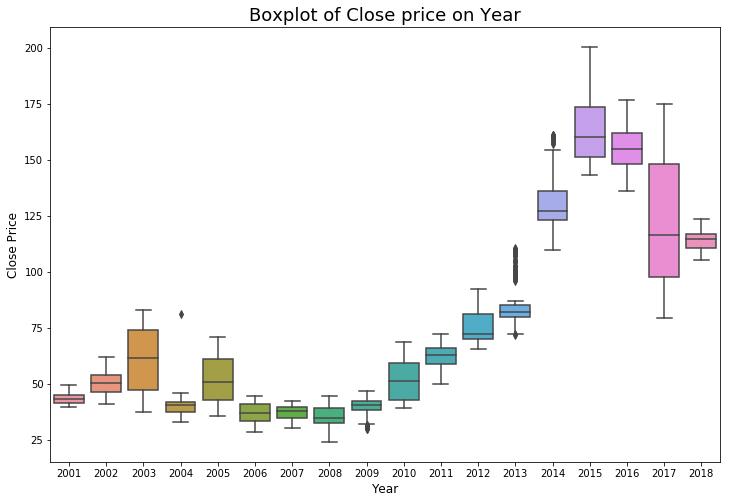

In [149]:
#Close Price vs. Year --- Not much information is obtained here..

plt.figure(figsize=(12,8))
sns.boxplot(x = 'year', y = 'close', data = aap)
plt.ylabel('Close Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Boxplot of Close price on Year', fontsize = 18)
plt.show()

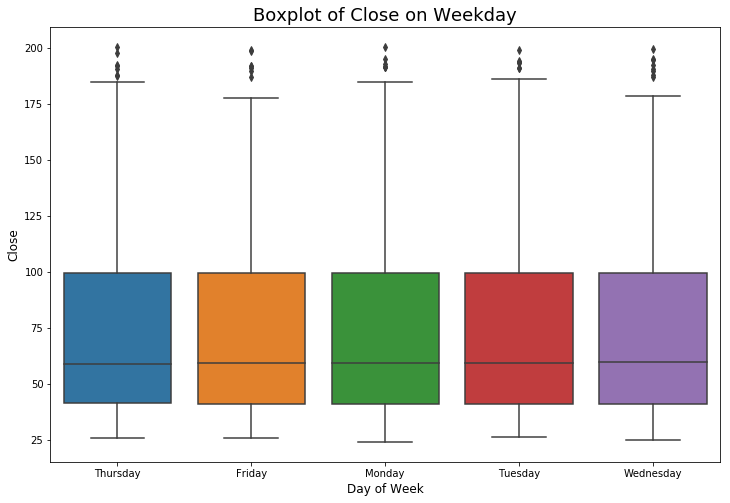

In [151]:
#Close price vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = 'day_of_week', y = 'close', data = aap)
plt.ylabel('Close', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Boxplot of Close on Weekday', fontsize = 18)
plt.show()

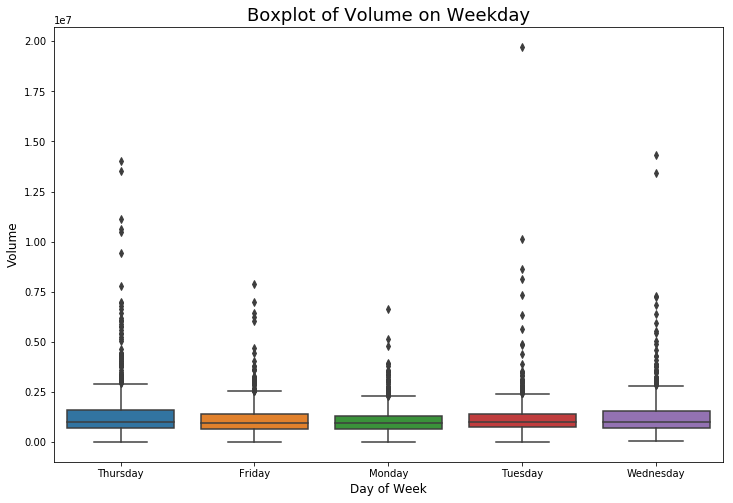

In [152]:
#Volume vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = 'day_of_week', y = 'adj_volume', data = aap)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.title('Boxplot of Volume on Weekday', fontsize = 18)
plt.show()

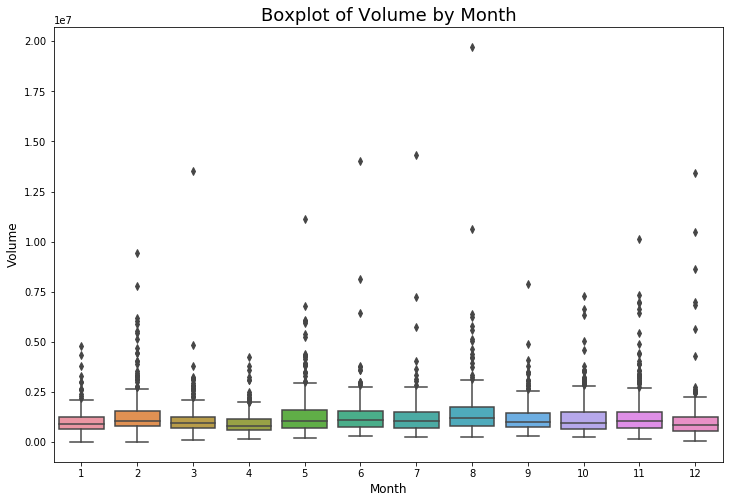

In [156]:
#Volume vs. Day of week

plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'adj_volume', data = aap)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Boxplot of Volume by Month', fontsize = 18)
plt.show()

In [116]:
#setting index as date values
aap['date'] = pd.to_datetime(aap.date,format='%Y-%m-%d')
aap.index = aap['date']

#sorting
data=aap.sort_index(ascending=True,axis=0)
data.head()

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(aap)),columns=['Date', 'Close'])

for i in range(0,len(aap)):
    new_data.loc[i]['Date'] = data['date'][i]
    new_data.loc[i]['Close'] = data['close'][i]
    
new_data.head()

C:\Users\quocn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Close
0,2001-11-29 00:00:00,41.7
1,2001-11-30 00:00:00,42.85
2,2001-12-03 00:00:00,41.35
3,2001-12-04 00:00:00,39.7
4,2001-12-05 00:00:00,44


In [118]:
new_data.head()

,Date,Close
0,2001-11-29 00:00:00,41.7
1,2001-11-30 00:00:00,42.85
2,2001-12-03 00:00:00,41.35
3,2001-12-04 00:00:00,39.7
4,2001-12-05 00:00:00,44


In [120]:
#create features
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

ModuleNotFoundError: No module named 'fastai'

In [121]:
pip install fastai


The following command must be run outside of the IPython shell:

    $ pip install fastai

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
